Mean Squared Error: 1403448528.016434


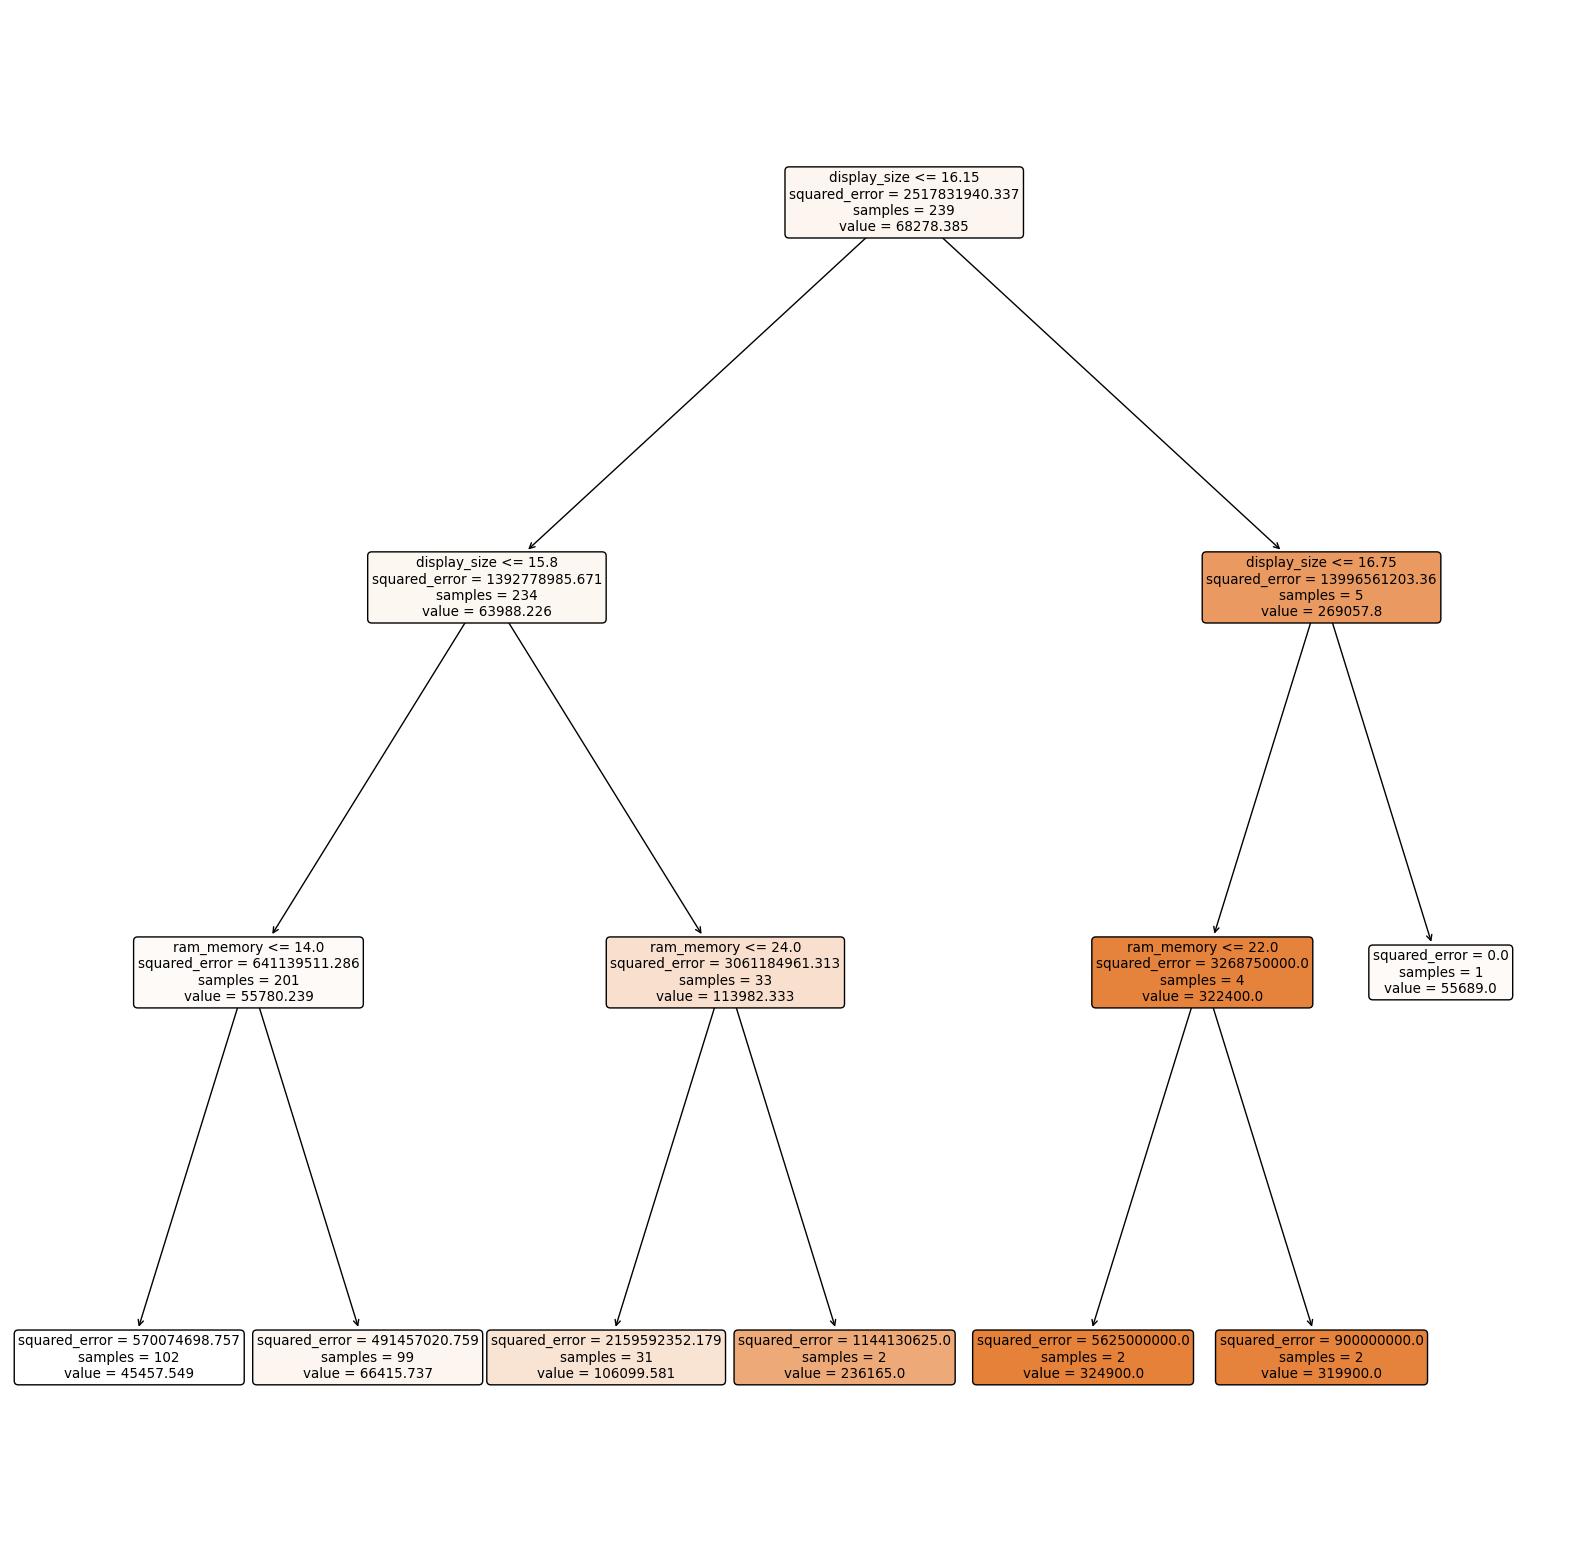

In [9]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('laptops_data.csv')

# Separate features (X) and target variable (y)
X = data.drop(columns=['Price'])  # Replace 'target_column_name' with the actual name of your target column
y = data['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree regression model
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = tree_reg.predict(X_test)

# Calculating mean squared error as a performance metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualizing the decision tree
plt.figure(figsize=(20, 20))
plot_tree(tree_reg, filled=True, rounded=True, feature_names=X.columns)
plt.show()


C:\Users\prave\AppData\Local\Temp\ipykernel_2232\39214836.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[outliers] = mean_val
C:\Users\prave\AppData\Local\Temp\ipykernel_2232\39214836.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[outliers] = mean_val
C:\Users\prave\AppData\Local\Temp\ipykernel_2232\39214836.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[outliers] = mean_val


Mean Squared Error: 1534498308.7171452


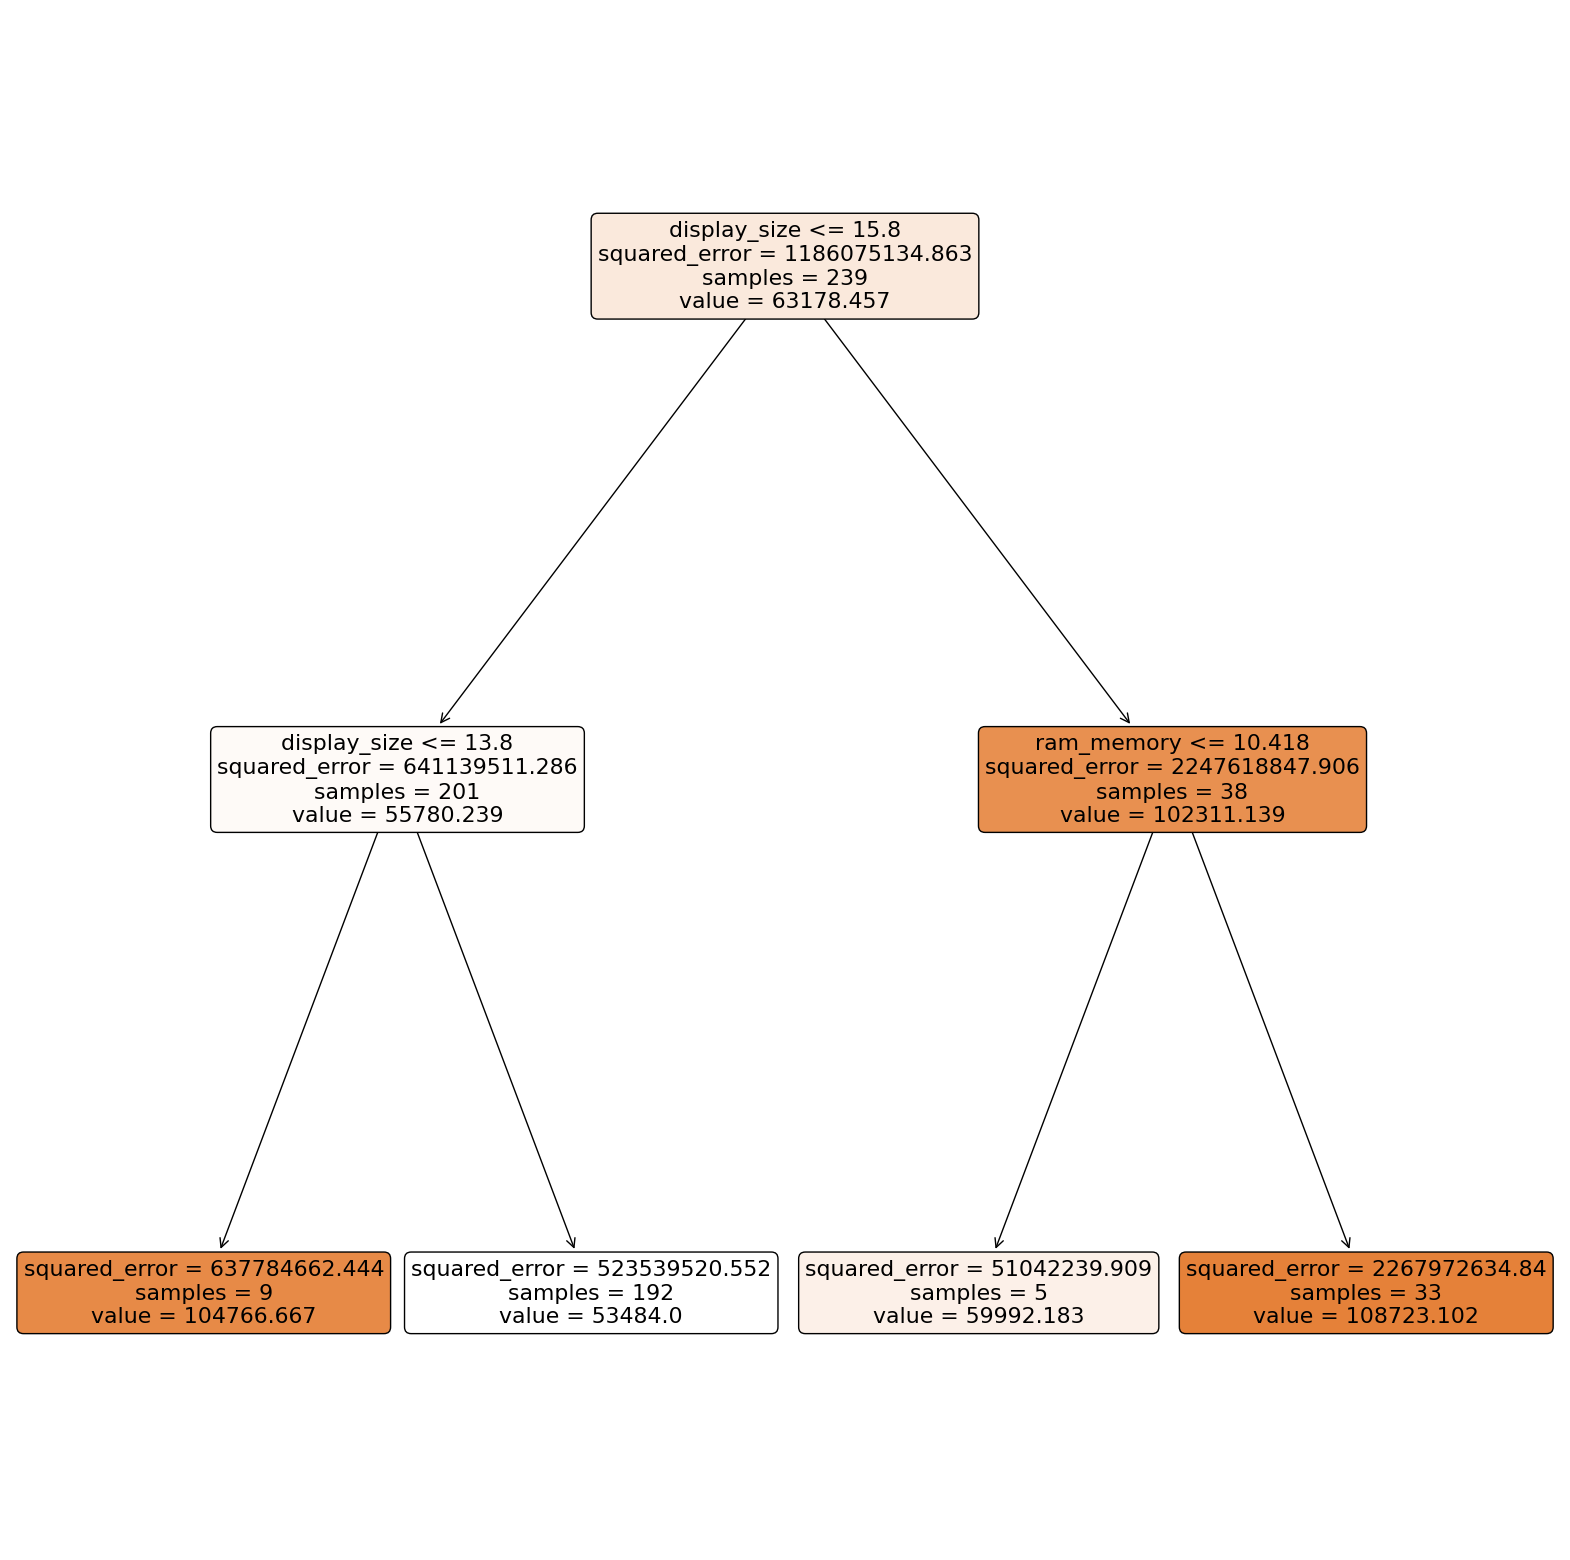

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load data from CSV file
data = pd.read_csv('laptops_data.csv')

# Replace outliers with mean
def replace_outliers_with_mean(series):
    mean_val = series.mean()
    std_val = series.std()
    outliers = (series - mean_val).abs() > 3 * std_val  # Define outliers as values more than 3 standard deviations away from the mean
    series[outliers] = mean_val
    return series

# Apply outlier replacement to numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    data[col] = replace_outliers_with_mean(data[col])

# Separate features (X) and target variable (y)
X = data.drop(columns=['Price'])
y = data['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree regression model
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = tree_reg.predict(X_test)

# Calculating mean squared error as a performance metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualizing the decision tree
plt.figure(figsize=(20, 20))
plot_tree(tree_reg, filled=True, rounded=True, feature_names=X.columns)
plt.show()


Mean Squared Error: 264489109.5273505


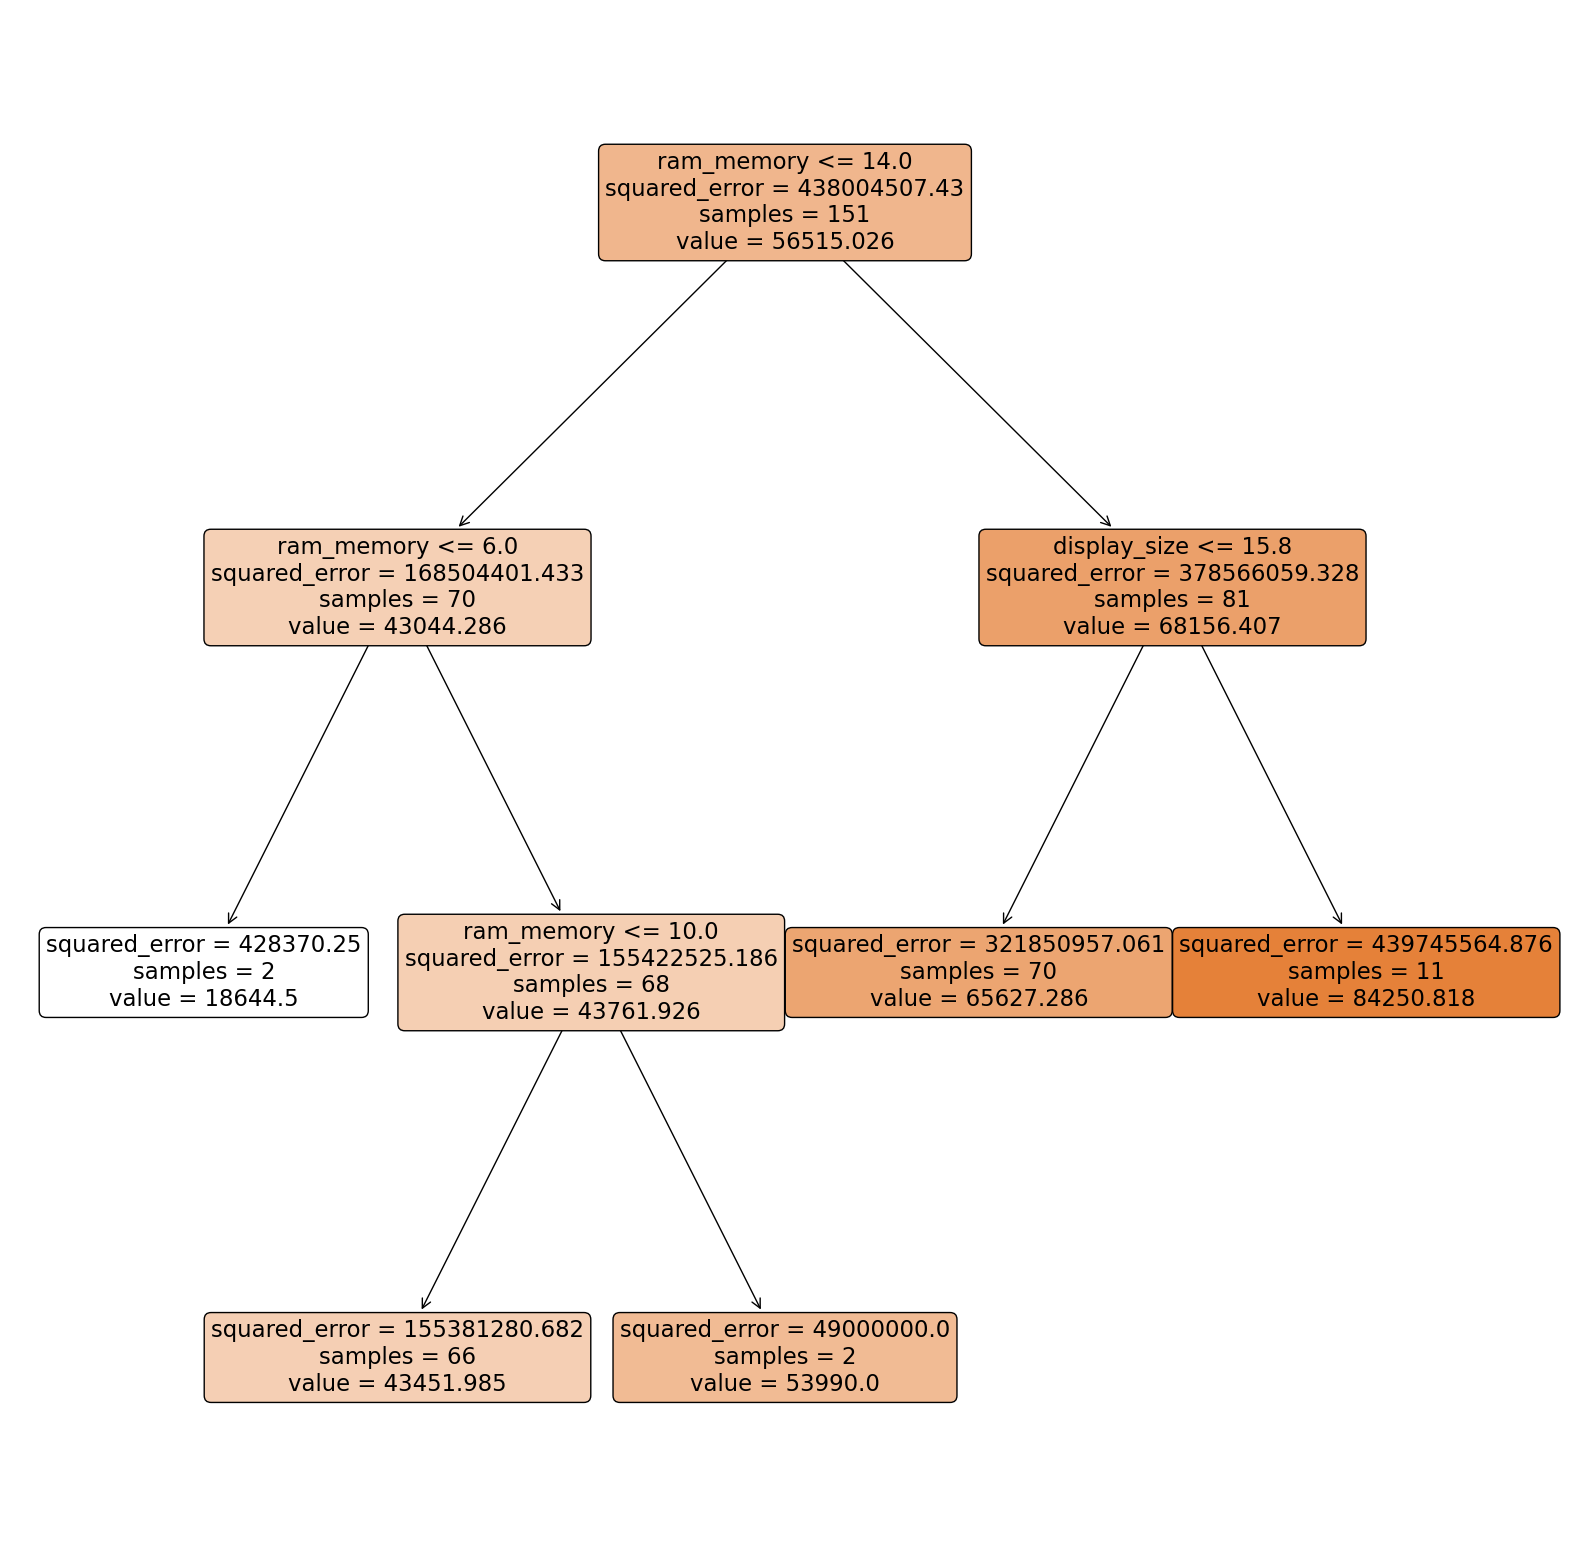

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load data from CSV file
data = pd.read_csv('laptops_data.csv')

# Define function to drop outliers
def drop_outliers(df, columns):
    for col in columns:
        # Calculate the 1st and 3rd quartiles
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        # Calculate the interquartile range
        iqr = q3 - q1
        
        # Define the outlier bounds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Drop outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Drop outliers from numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
data = drop_outliers(data, numerical_columns)

# Separate features (X) and target variable (y)
X = data.drop(columns=['Price'])
y = data['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree regression model
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = tree_reg.predict(X_test)

# Calculating mean squared error as a performance metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualizing the decision tree
plt.figure(figsize=(20, 20))
plot_tree(tree_reg, filled=True, rounded=True, feature_names=X.columns)
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load data from CSV file
data = pd.read_csv('laptops_data.csv')

# Separate features (X) and target variable (y)
X = data.drop(columns=['Price'])
y = data['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor object
tree_reg = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 9],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters found
print("Best Parameters:", best_params)

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate mean squared error as a performance metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error: 1360066849.619271
